In [37]:
# ============================================
# IDENTIFY EDIBILITY OF MUSHROOMS — EDA NOTEBOOK
# ============================================

# PURPOSE:
# Understand the PAST: structure, quality, patterns, and group risks.
# This prepares us to build a reliable predictive model later.

CSV_PATH = "C:/Users/benni/Documents/Software 2/Machine Learning/Projekt/bedste-gruppe-ml/data/raw_data/mushroom_raw_data.csv"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
from sklearn.preprocessing import LabelEncoder


sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# Ignore warnings
w.filterwarnings("ignore", category=FutureWarning, module="seaborn")
pd.set_option('future.no_silent_downcasting', True)

print("Libraries loaded.")


Libraries loaded.


In [38]:
# 1) LOAD DATA
df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
df.head()


Shape: (8416, 23)


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [39]:
# 2) BASIC STRUCTURE
display(df.info())
display(df.isnull().sum())

# Unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


print("""
WHAT WE'RE LOOKING FOR:
- Column data types
- Text categories vs numeric fields
- Any strange/unexpected values
""")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8416 non-null   object
 1   cap-shape                 8416 non-null   object
 2   cap-surface               8416 non-null   object
 3   cap-color                 8416 non-null   object
 4   bruises                   8416 non-null   object
 5   odor                      8416 non-null   object
 6   gill-attachment           8416 non-null   object
 7   gill-spacing              8416 non-null   object
 8   gill-size                 8416 non-null   object
 9   gill-color                8416 non-null   object
 10  stalk-shape               8416 non-null   object
 11  stalk-root                5936 non-null   object
 12  stalk-surface-above-ring  8416 non-null   object
 13  stalk-surface-below-ring  8416 non-null   object
 14  stalk-color-above-ring  

None

poisonous                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

poisonous: 2 unique values
cap-shape: 6 unique values
cap-surface: 4 unique values
cap-color: 10 unique values
bruises: 2 unique values
odor: 9 unique values
gill-attachment: 2 unique values
gill-spacing: 2 unique values
gill-size: 2 unique values
gill-color: 12 unique values
stalk-shape: 2 unique values
stalk-root: 4 unique values
stalk-surface-above-ring: 4 unique values
stalk-surface-below-ring: 4 unique values
stalk-color-above-ring: 9 unique values
stalk-color-below-ring: 9 unique values
veil-type: 1 unique values
veil-color: 4 unique values
ring-number: 3 unique values
ring-type: 5 unique values
spore-print-color: 9 unique values
population: 6 unique values
habitat: 7 unique values

WHAT WE'RE LOOKING FOR:
- Column data types
- Text categories vs numeric fields
- Any strange/unexpected values



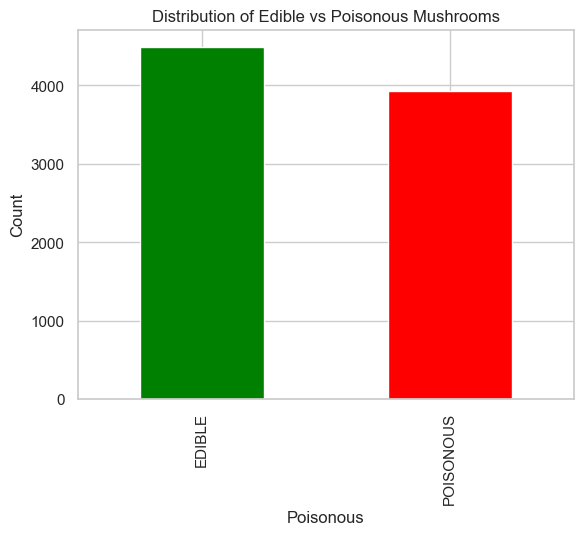

In [41]:
# 3) Class distribution
df['poisonous'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.xlabel("Poisonous")
plt.ylabel("Count")
plt.show()


In [42]:
# 4 ) CHECK FOR DUPLICATES
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 292


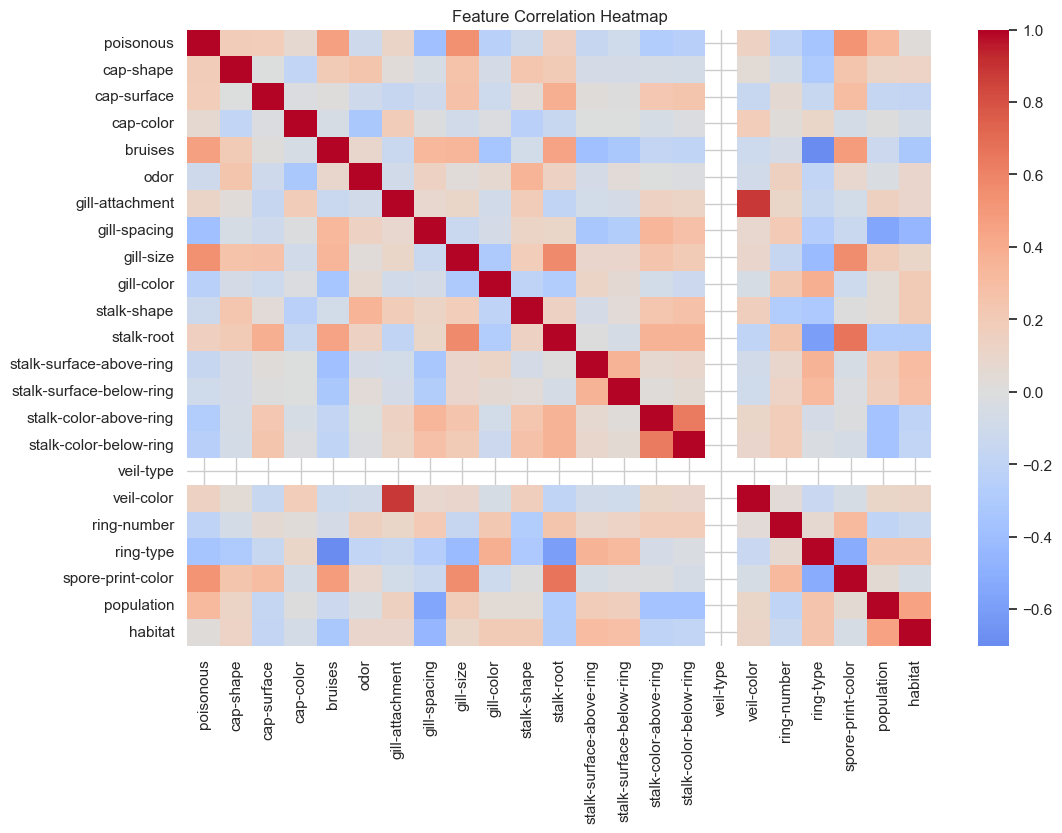

In [43]:
# 5) Encode Categorical Values Temporarily for Correlation Heatmap
encoded_df = df.copy()
le = LabelEncoder()
for col in encoded_df.columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])

corr = encoded_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\benni\AppData\Local\Temp\ipykernel_6680\1126638742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


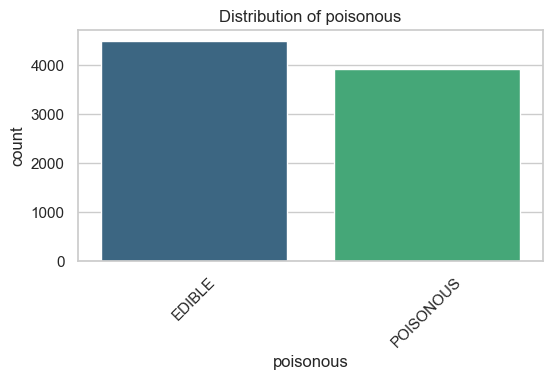

C:\Users\benni\AppData\Local\Temp\ipykernel_6680\1126638742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


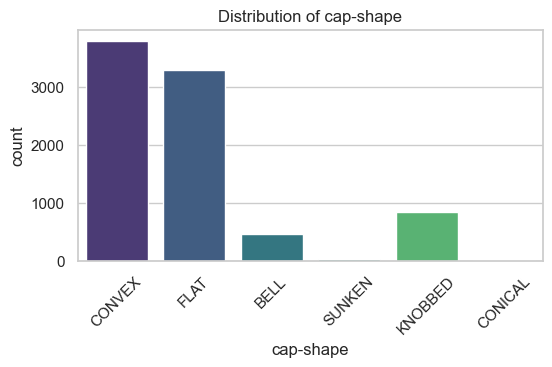

C:\Users\benni\AppData\Local\Temp\ipykernel_6680\1126638742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


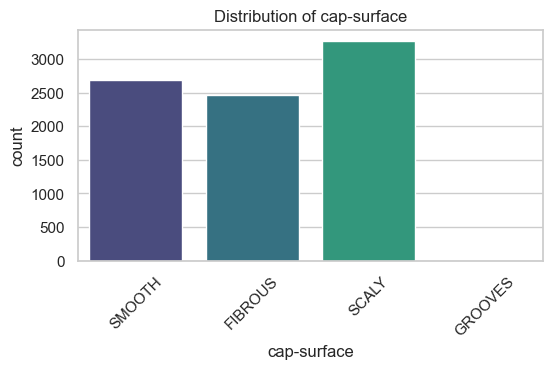

C:\Users\benni\AppData\Local\Temp\ipykernel_6680\1126638742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


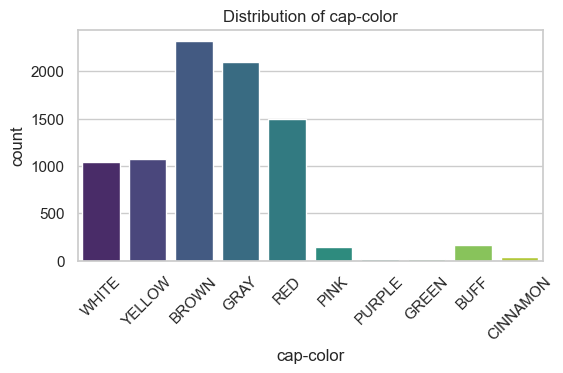

C:\Users\benni\AppData\Local\Temp\ipykernel_6680\1126638742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


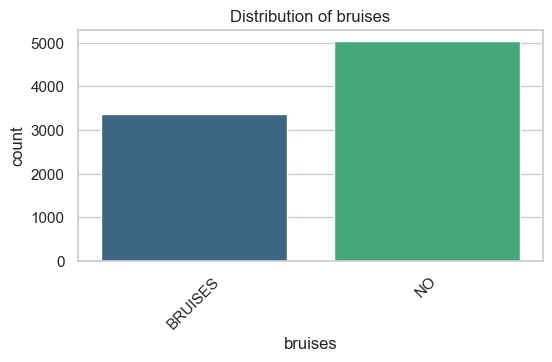

In [44]:
# 6) Univariate Analysis
for col in df.columns[:5]:  # show first 5; adjust as needed
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()



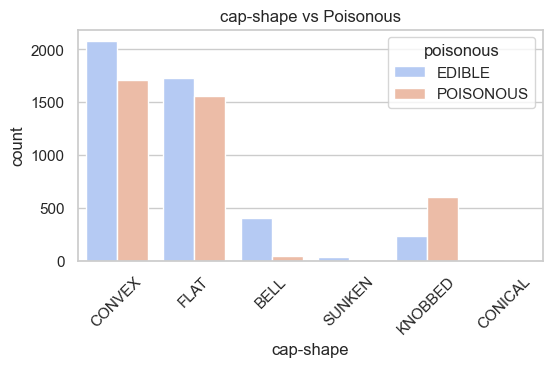

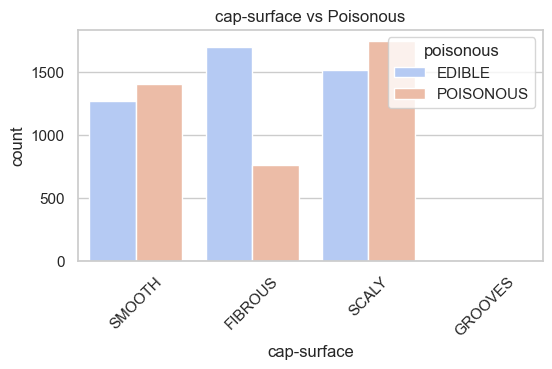

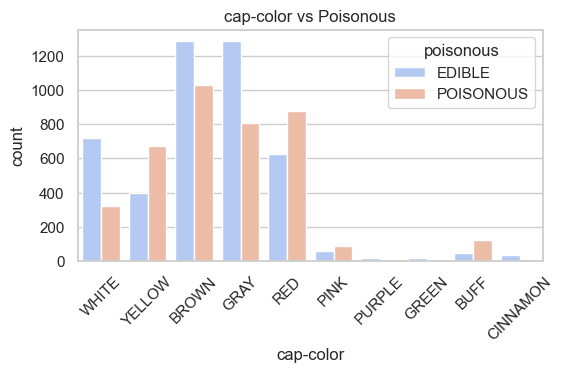

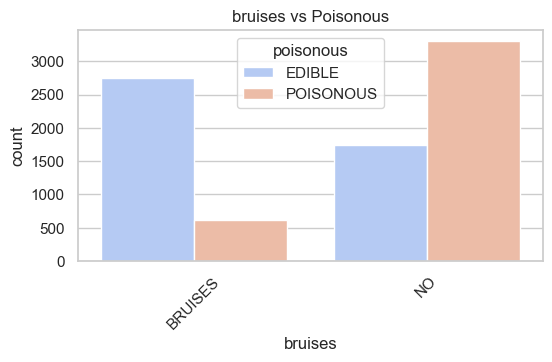

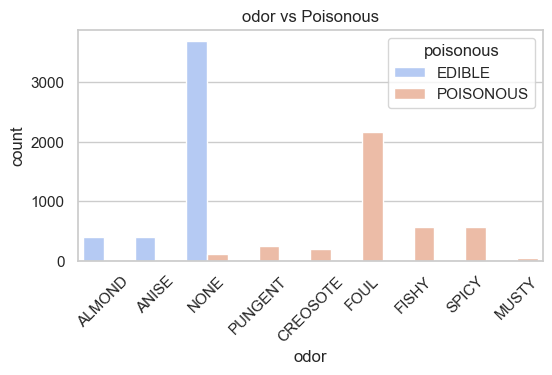

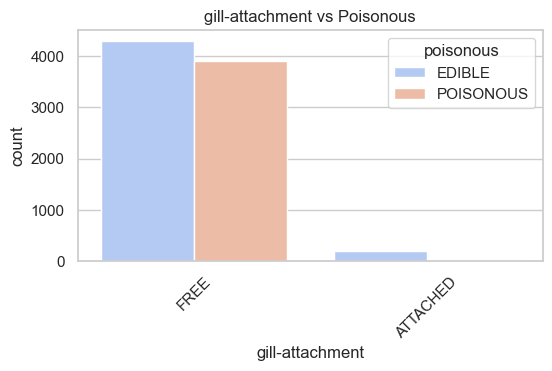

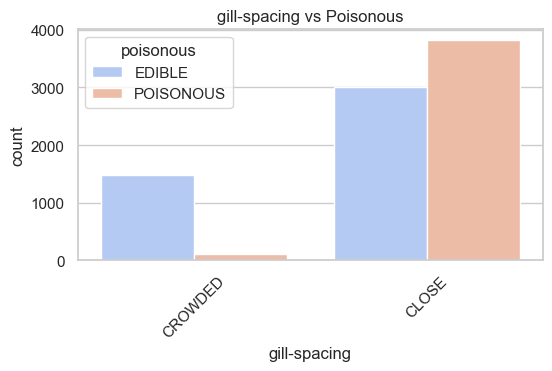

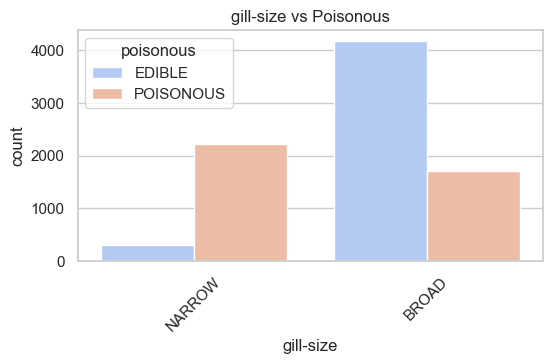

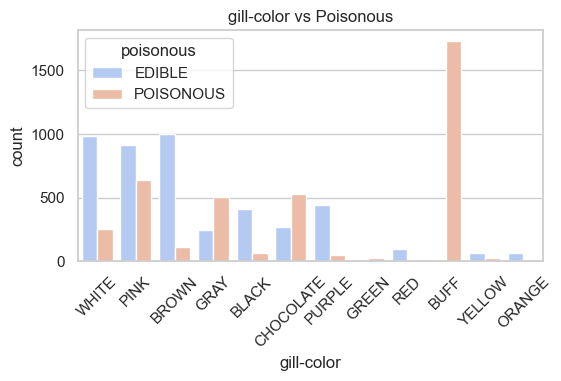

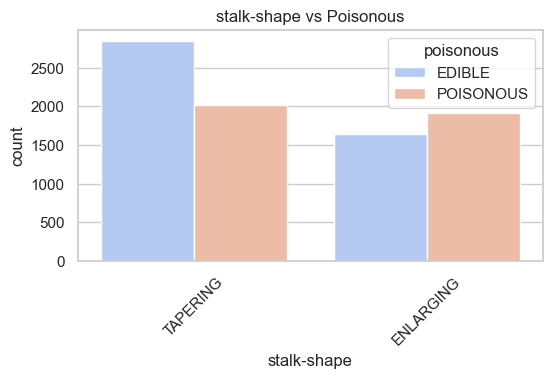

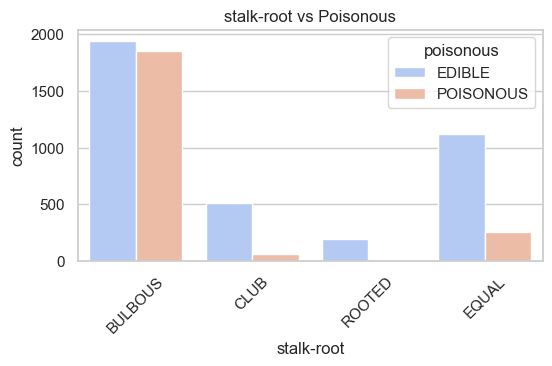

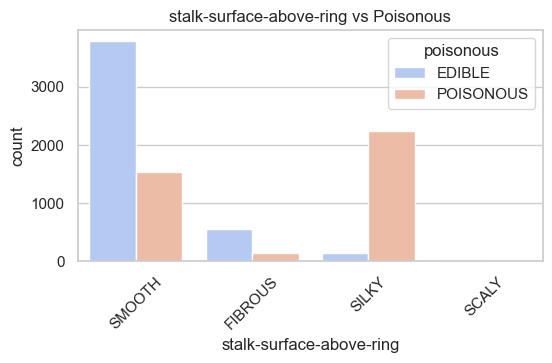

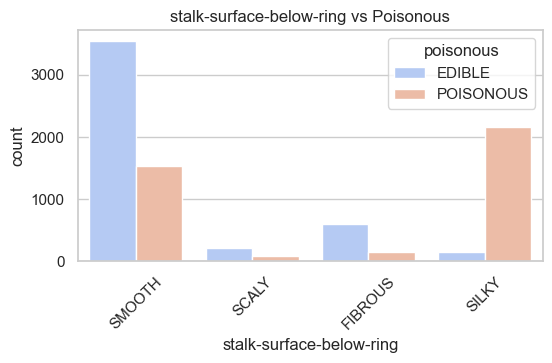

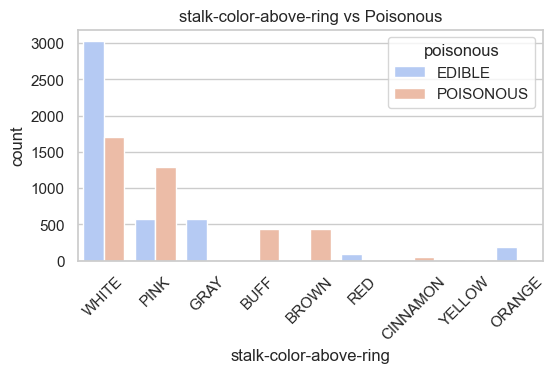

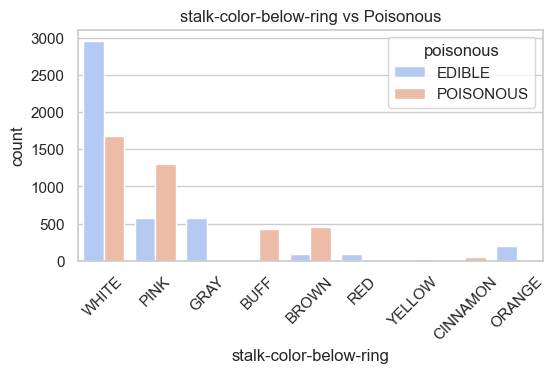

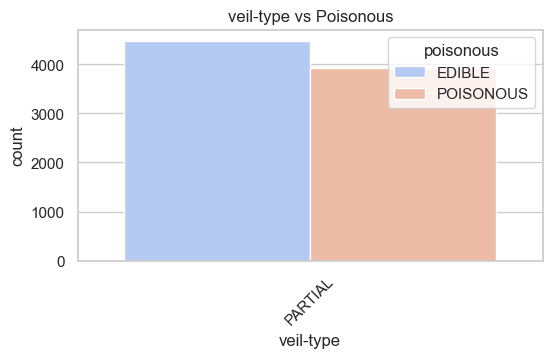

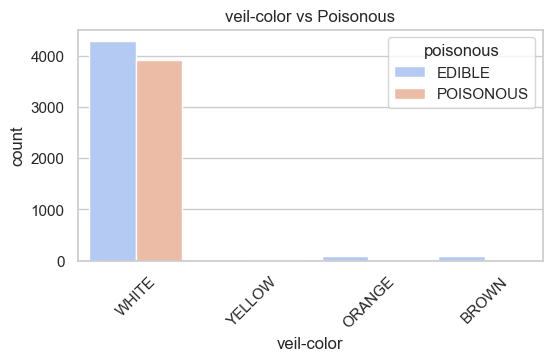

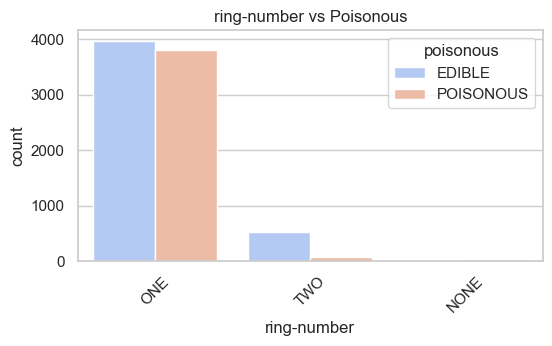

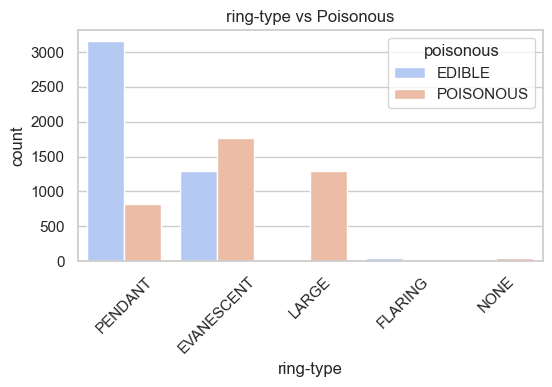

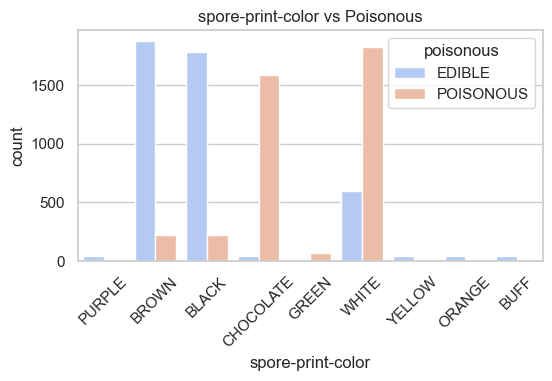

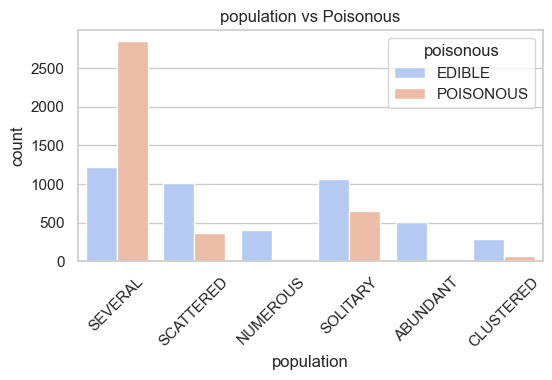

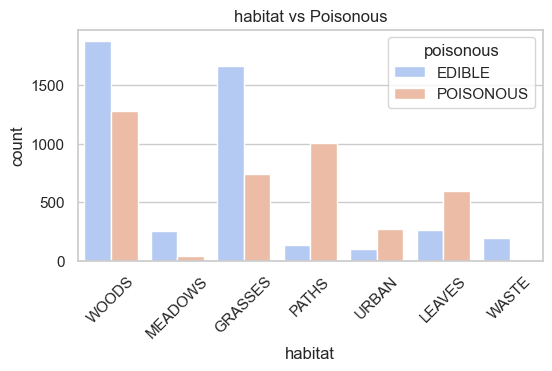

In [46]:
# 7 ) Bivariate Analysis (Feature vs Class)
categorical_cols = [col for col in df.columns if col != 'poisonous']

for col in categorical_cols[:22]:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='poisonous', data=df, palette='coolwarm')
    plt.title(f"{col} vs Poisonous")
    plt.xticks(rotation=45)
    plt.show()


In [47]:
# 8) Summary Statistics for Encoded Features
encoded_df.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.0,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000
mean,0.466730,2.494297,1.733840,4.264734,0.598859,4.828897,0.974335,0.189163,0.301331,4.692490,0.577947,1.641635,2.464354,2.392110,5.493346,5.422053,0.0,1.966730,1.065589,2.216730,3.000951,3.576046,3.120722
std,0.498922,0.892014,1.190765,3.403228,0.490159,1.961047,0.158144,0.391662,0.458863,3.353737,0.493916,1.716689,0.864793,0.914532,2.128817,2.196872,0.0,0.238505,0.269635,1.817479,2.824054,1.314272,2.552022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000,5.000000,5.000000,0.0,2.000000,1.000000,0.000000,1.000000,3.000000,0.000000
50%,0.000000,2.000000,2.000000,3.000000,1.000000,6.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,3.000000,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,3.000000
75%,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,1.000000,0.000000,1.000000,7.000000,1.000000,4.000000,3.000000,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,6.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


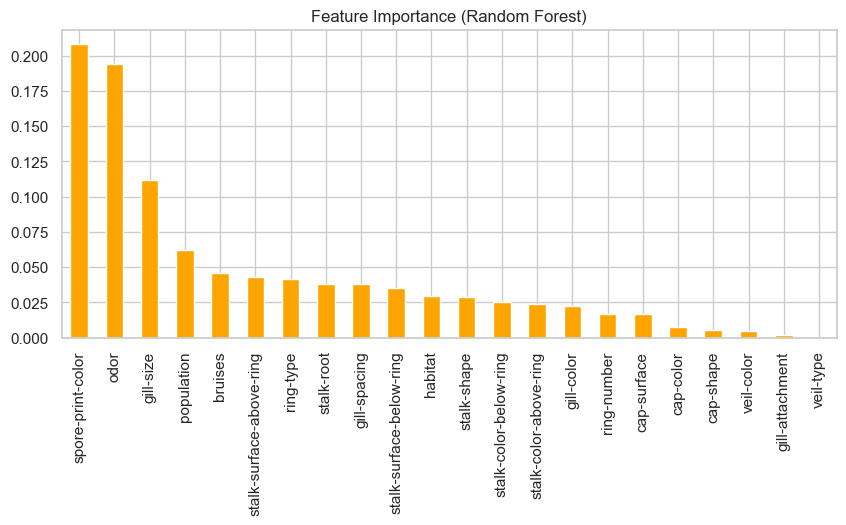

In [49]:
# 9 ) Determine what features are mostly correlated to our target value
from sklearn.ensemble import RandomForestClassifier

X = encoded_df.drop("poisonous", axis=1)
y = encoded_df["poisonous"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,4), color='orange')
plt.title("Feature Importance (Random Forest)")
plt.show()